读取数据

In [22]:
import pandas as pd
df = pd.read_csv('stock_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1760 entries, 0 to 1759
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   日期      1760 non-null   object 
 1   股票代码    1760 non-null   int64  
 2   开盘      1760 non-null   float64
 3   收盘      1760 non-null   float64
 4   最高      1760 non-null   float64
 5   最低      1760 non-null   float64
 6   成交量     1760 non-null   int64  
 7   成交额     1760 non-null   float64
 8   振幅      1760 non-null   float64
 9   涨跌幅     1760 non-null   float64
 10  涨跌额     1760 non-null   float64
 11  换手率     1760 non-null   float64
dtypes: float64(9), int64(2), object(1)
memory usage: 165.1+ KB


把日期转换成时间格式并设置成索引，选取部分变量

In [23]:
columns = ['日期','开盘', '最高', '收盘', '最低', '成交量']
df['日期']=pd.to_datetime(df['日期'])
df = df[columns]
df.set_index('日期', inplace=True)

绘制一段时间内的K线图

             open   high  close    low   volume
日期                                             
2017-03-01   9.49   9.55   9.49   9.47   346994
2017-03-02   9.51   9.54   9.43   9.42   403629
2017-03-03   9.41   9.43   9.40   9.36   342655
2017-03-06   9.40   9.46   9.45   9.39   404511
2017-03-07   9.44   9.46   9.45   9.40   294673
...           ...    ...    ...    ...      ...
2024-05-22  11.56  11.74  11.56  11.46  2115531
2024-05-23  11.53  11.59  11.40  11.37  1841623
2024-05-24  11.37  11.49  11.31  11.30  1398276
2024-05-27  11.31  11.53  11.51  11.31  1454361
2024-05-28  11.50  11.58  11.40  11.36  1204323

[1760 rows x 5 columns]


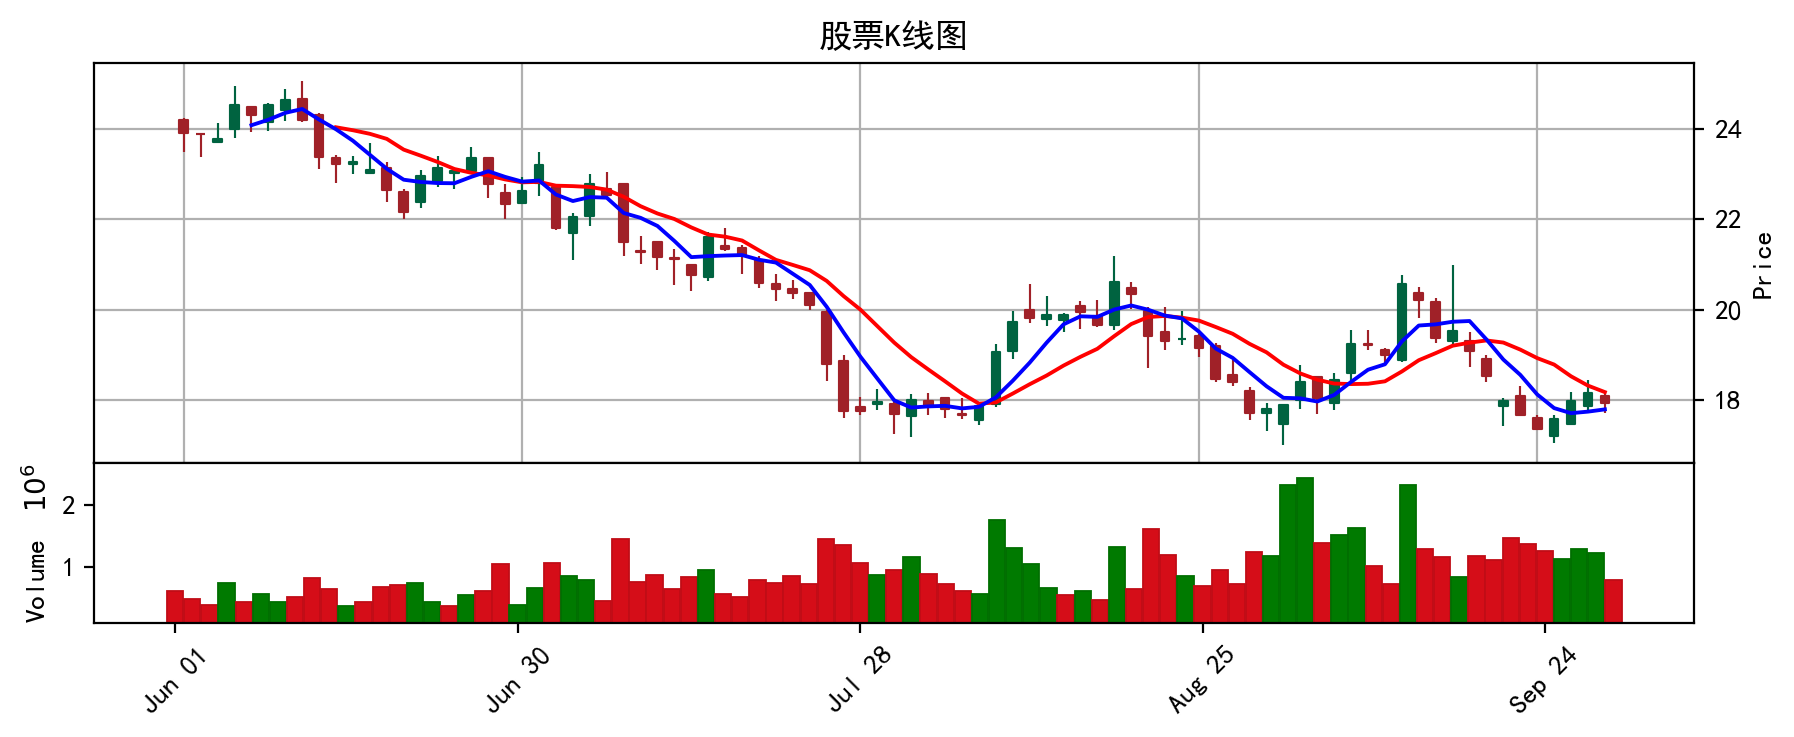

In [24]:
import matplotlib.pyplot as plt
import mplfinance as mpf

data = df.rename(columns={'开盘': 'open', '最高': 'high', '收盘': 'close', '最低': 'low', '成交量': 'volume'})

def kline(data,start_time,end_time):#绘制K线图
    print(data)
    plt.rcParams['font.sans-serif'] = ['SimHei']
    plt.rcParams['axes.unicode_minus'] = False
    # 处理数据
    data = data[start_time:end_time]

    fig = plt.figure(figsize=(8, 4),dpi=200)
    ax = fig.add_axes([0,0.2,1,0.5])
    ax2 = fig.add_axes([0,0,1,0.2])
    # 绘制K线图
    mpf.plot(data,type='candle', style='charles', ax=ax, volume=ax2,mav=(10,5),mavcolors=('r','b'))

    ax.set_title("股票K线图")
    ax.grid(True)
    plt.show()

start_time = '2021-06-01'
end_time = '2021-09-30'
kline(data,start_time,end_time)

异常值处理和归一化并划分数据

In [25]:
for col in columns:
    if col == '日期':
        continue
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    df = df[~((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR)))]
    outlier_condition = (df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))

    print(df[col][outlier_condition])

Series([], Name: 开盘, dtype: float64)
Series([], Name: 最高, dtype: float64)
Series([], Name: 收盘, dtype: float64)
Series([], Name: 最低, dtype: float64)
Series([], Name: 成交量, dtype: int64)


In [26]:
df.interpolate(method='time')

,开盘,最高,收盘,最低,成交量
日期,,,,,
2017-03-01,9.49,9.55,9.49,9.47,346994
2017-03-02,9.51,9.54,9.43,9.42,403629
2017-03-03,9.41,9.43,9.40,9.36,342655
2017-03-06,9.40,9.46,9.45,9.39,404511
2017-03-07,9.44,9.46,9.45,9.40,294673
...,...,...,...,...,...
2024-05-22,11.56,11.74,11.56,11.46,2115531
2024-05-23,11.53,11.59,11.40,11.37,1841623
2024-05-24,11.37,11.49,11.31,11.30,1398276


In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scalers = {}

for col in df.columns:
    scaler = MinMaxScaler()
    df[col] = scaler.fit_transform(df[col].values.reshape(-1, 1))
    scalers[col] = scaler
print(df)

                  开盘        最高        收盘        最低       成交量
日期                                                          
2017-03-01  0.075733  0.073927  0.076349  0.086221  0.059304
2017-03-02  0.077362  0.073132  0.071369  0.081995  0.087389
2017-03-03  0.069218  0.064388  0.068880  0.076923  0.057153
2017-03-06  0.068404  0.066773  0.073029  0.079459  0.087826
2017-03-07  0.071661  0.066773  0.073029  0.080304  0.033359
...              ...       ...       ...       ...       ...
2024-05-22  0.244300  0.248013  0.248133  0.254438  0.936297
2024-05-23  0.241857  0.236089  0.234855  0.246830  0.800470
2024-05-24  0.228827  0.228140  0.227386  0.240913  0.580620
2024-05-27  0.223941  0.231320  0.243983  0.241758  0.608432
2024-05-28  0.239414  0.235294  0.234855  0.245985  0.484442

[1560 rows x 5 columns]


划分数据集

In [28]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, shuffle=False)

In [29]:
import numpy as np
def data_split(dataset, look_back=100):
    X, y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), :]
        X.append(a)
        y.append(dataset[i + look_back, :])
    return np.array(X), np.array(y)

X_train, y_train = data_split(train.values)
X_test, y_test = data_split(test.values)
print(train,test)

                  开盘        最高        收盘        最低       成交量
日期                                                          
2017-03-01  0.075733  0.073927  0.076349  0.086221  0.059304
2017-03-02  0.077362  0.073132  0.071369  0.081995  0.087389
2017-03-03  0.069218  0.064388  0.068880  0.076923  0.057153
2017-03-06  0.068404  0.066773  0.073029  0.079459  0.087826
2017-03-07  0.071661  0.066773  0.073029  0.080304  0.033359
...              ...       ...       ...       ...       ...
2023-01-11  0.479642  0.489666  0.506224  0.502113  0.299101
2023-01-12  0.505700  0.488871  0.506224  0.513948  0.197508
2023-01-13  0.497557  0.503180  0.529461  0.515638  0.357873
2023-01-16  0.520358  0.529412  0.540249  0.540997  0.660837
2023-01-17  0.535016  0.521463  0.531120  0.534235  0.351302

[1248 rows x 5 columns]                   开盘        最高        收盘        最低       成交量
日期                                                          
2023-01-18  0.520358  0.521463  0.542739  0.546069  0.243496

定义神经网络

In [30]:
from keras.models import Sequential
from keras.layers import Conv1D, LSTM, Dense, Dropout, Input
from keras.optimizers import Nadam

model = Sequential([
    Input(shape=(X_train.shape[1], X_train.shape[2])),
    Conv1D(
        filters=64,
        kernel_size=3,
        activation="relu"
    ),
    Dropout(0.2),
    LSTM(50, return_sequences=True),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(5)
])

model.compile(optimizer=Nadam(learning_rate=0.001), loss="mse")
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_1 (Conv1D)               │ (None, 98, 64)         │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 98, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 98, 50)         │        23,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 98, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           255 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,479 (173.75 KB)

 Trainable params: 44,479 (173.75 KB)

 Non-trainable params: 0 (0.00 B)

开始训练模型

In [31]:
from keras.callbacks import EarlyStopping
#早停策略
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

print(X_train, y_train)
history = model.fit(
    X_train,
    y_train,
    epochs=40,
    batch_size=32,
    validation_data=(X_test, y_test),
    shuffle=False,
    callbacks=[es]
)
model.save('股票数据预测.h5')

[[[0.0757329  0.07392687 0.07634855 0.08622147 0.05930448]
  [0.07736156 0.07313196 0.07136929 0.08199493 0.08738898]
  [0.06921824 0.06438792 0.06887967 0.07692308 0.05715283]
  ...
  [0.16693811 0.17408585 0.18008299 0.18005072 0.29346229]
  [0.18241042 0.17488076 0.17427386 0.16906171 0.66868377]
  [0.16938111 0.19554849 0.20497925 0.18174134 0.8967149 ]]

 [[0.07736156 0.07313196 0.07136929 0.08199493 0.08738898]
  [0.06921824 0.06438792 0.06887967 0.07692308 0.05715283]
  [0.06840391 0.06677266 0.07302905 0.079459   0.08782635]
  ...
  [0.18241042 0.17488076 0.17427386 0.16906171 0.66868377]
  [0.16938111 0.19554849 0.20497925 0.18174134 0.8967149 ]
  [0.20276873 0.21621622 0.21410788 0.21217244 0.90978596]]

 [[0.06921824 0.06438792 0.06887967 0.07692308 0.05715283]
  [0.06840391 0.06677266 0.07302905 0.079459   0.08782635]
  [0.07166124 0.06677266 0.07302905 0.08030431 0.03335924]
  ...
  [0.16938111 0.19554849 0.20497925 0.18174134 0.8967149 ]
  [0.20276873 0.21621622 0.2141078

36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 0.0450 - val_loss: 0.0222
Epoch 2/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0216 - val_loss: 0.0224
Epoch 3/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0228 - val_loss: 0.0273
Epoch 4/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0249 - val_loss: 0.0236
Epoch 5/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0218 - val_loss: 0.0216
Epoch 6/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0219 - val_loss: 0.0168
Epoch 7/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0192 - val_loss: 0.0146
Epoch 8/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0164 - val_loss: 0.0147
Epoch 9/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0151 - val_loss: 0.0144
Epoch 10/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0149 - val_loss: 0.0145
Epoch 11/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0137 - val_loss: 0.0120
Epoch 12/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0130 - val_l

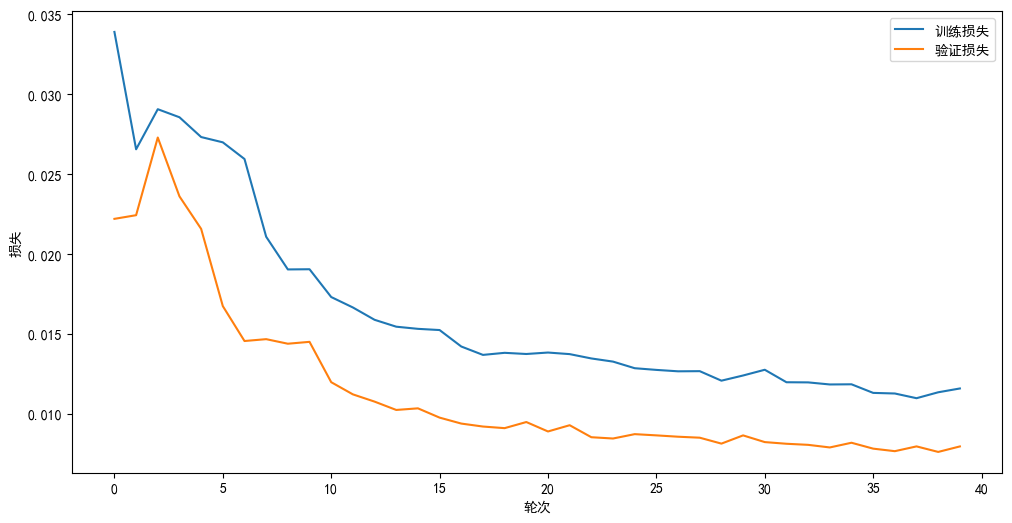

In [32]:
# 绘制训练损失和验证损失
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='训练损失')
plt.plot(history.history['val_loss'], label='验证损失')
plt.xlabel('轮次')
plt.ylabel('损失')
plt.legend()
plt.show()

进行反归一化

               开盘     最高     收盘     最低        成交量
日期                                               
2017-03-01   9.49   9.55   9.49   9.47   346994.0
2017-03-02   9.51   9.54   9.43   9.42   403629.0
2017-03-03   9.41   9.43   9.40   9.36   342655.0
2017-03-06   9.40   9.46   9.45   9.39   404511.0
2017-03-07   9.44   9.46   9.45   9.40   294673.0
...           ...    ...    ...    ...        ...
2024-05-22  11.56  11.74  11.56  11.46  2115531.0
2024-05-23  11.53  11.59  11.40  11.37  1841623.0
2024-05-24  11.37  11.49  11.31  11.30  1398276.0
2024-05-27  11.31  11.53  11.51  11.31  1454361.0
2024-05-28  11.50  11.58  11.40  11.36  1204323.0

[1560 rows x 5 columns]
2021-06-01 2021-09-30
             open   high  close    low     volume
日期                                               
2017-03-01   9.49   9.55   9.49   9.47   346994.0
2017-03-02   9.51   9.54   9.43   9.42   403629.0
2017-03-03   9.41   9.43   9.40   9.36   342655.0
2017-03-06   9.40   9.46   9.45   9.39   404511.0
201

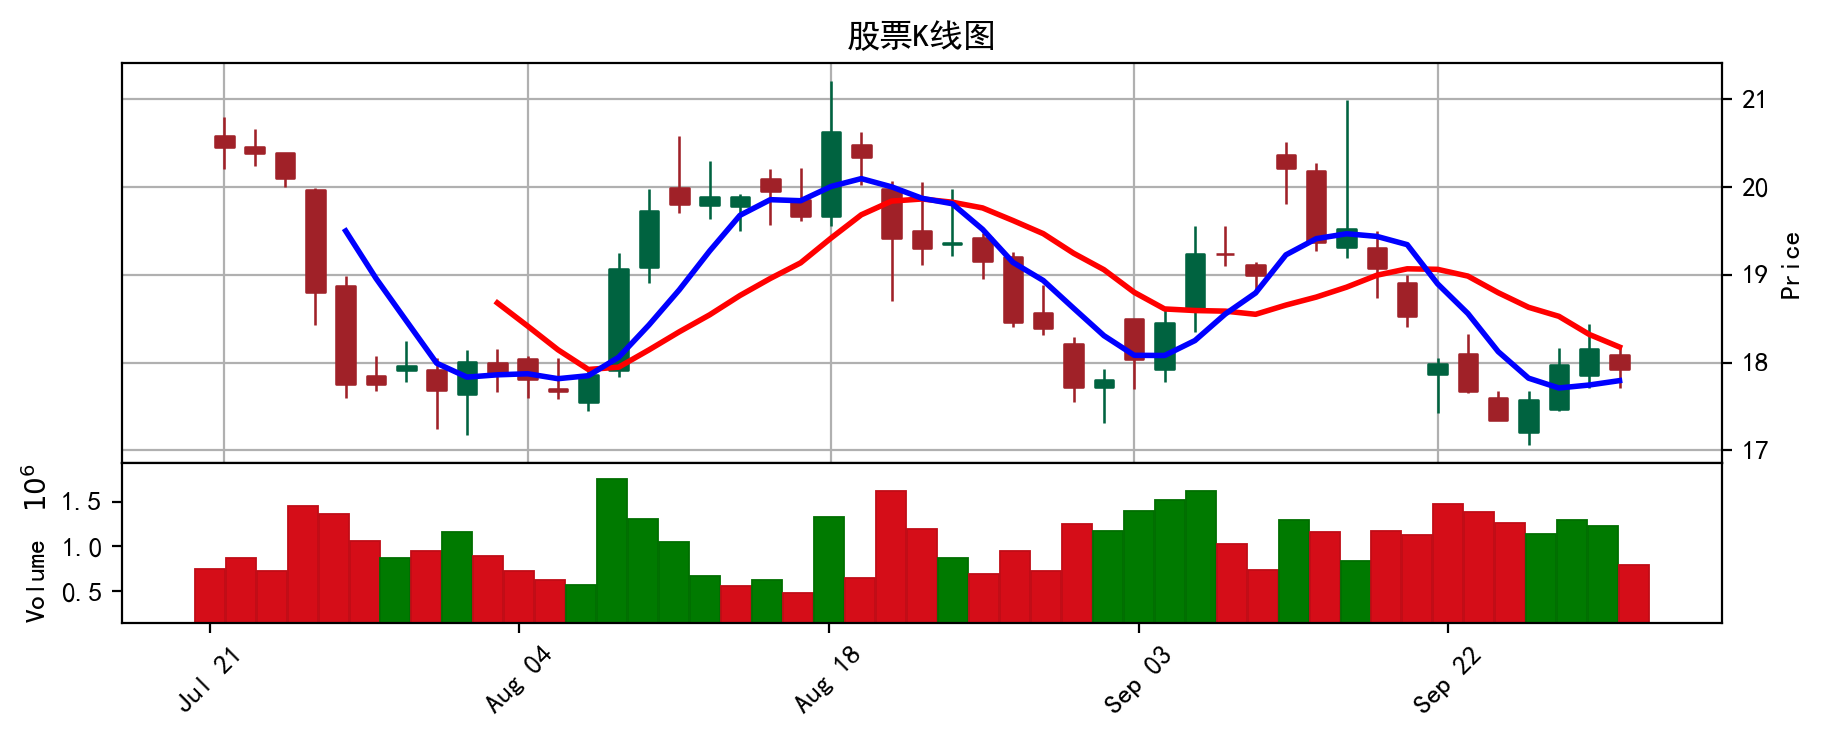

In [33]:
def inverse_scaling(df, scalers):
    #归一化数据逆缩放
    df_inverse = pd.DataFrame()
    for col in df.columns:
        df_inverse[col] = scalers[col].inverse_transform(df[col].values.reshape(-1, 1)).flatten()
    return df_inverse

df_inverse = inverse_scaling(df, scalers)
df_inverse['日期'] = df.index
df_inverse.set_index('日期', inplace=True)
print(df_inverse)#原数据
df_inverse = df_inverse.rename(columns={'开盘': 'open', '最高': 'high', '收盘': 'close', '最低': 'low', '成交量': 'volume'})
print(start_time,end_time)
kline(df_inverse,start_time,end_time)

前面的步骤：
1.读取数据
2.进行数据预处理，包括异常值、缺失值处理和归一化
3.分割数据成训练集和测试集
4.把数据的60天的时间步放到了X_train和X_test
5.定义模型的参数和神经网络
6.使用包含时间步的数据进行模型训练

希望使用的模型步骤
模型接受数据类型：
(样本量，时间步长为60的数据，维度为5)
通过包含前六十天的数据预测明天的数据
把明天的数据加到原数据，通过包含前五十九天的数据和明天的数据来预测后天的数据

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


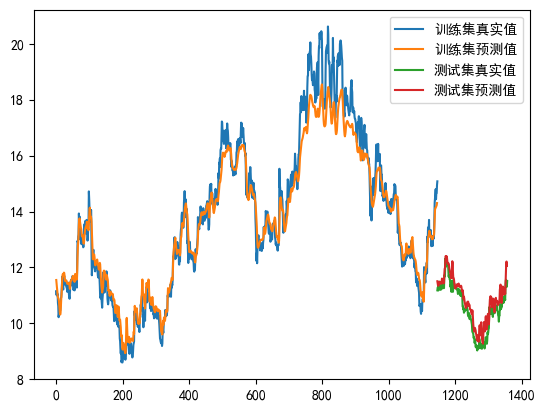

In [34]:
def predict(X, y, scalers):
    # 预测
    y_pred = model.predict(X)
    y_pred = pd.DataFrame(y_pred, columns=y.columns)
    y_pred = inverse_scaling(y_pred, scalers)
    y_true = inverse_scaling(y, scalers)
    return y_pred, y_true

y_pred_train, y_true_train = predict(X_train, pd.DataFrame(y_train, columns=test.columns), scalers)
y_pred_test, y_true_test = predict(X_test, pd.DataFrame(y_test, columns=test.columns), scalers)

# 创建一个新的图表
plt.figure()

# 计算偏移量
offset = len(y_true_train) - 1

# 绘制训练集的真实值和预测值
plt.plot(range(len(y_true_train)), y_true_train['收盘'], label='训练集真实值')
plt.plot(range(len(y_pred_train) - 1), y_pred_train['收盘'][1:], label='训练集预测值')

# 绘制测试集的真实值和预测值，x 值加上偏移量
plt.plot(range(offset, offset + len(y_true_test)), y_true_test['收盘'], label='测试集真实值')
plt.plot(range(offset, offset + len(y_pred_test) - 1), y_pred_test['收盘'][1:], label='测试集预测值')

# 添加图例
plt.legend()

# 显示图表
plt.show()

In [35]:
last_part = X_test[0, :, :]

columns = ['开盘', '最高', '收盘', '最低', '成交量']
last_part = pd.DataFrame(last_part, columns=columns)

last_part = np.expand_dims(last_part, axis=0)
pred = model.predict(last_part)#包含时间步长
pred = inverse_scaling(pd.DataFrame(pred, columns=columns), scalers)
print(pred)

def predict_data(last_part, days=10):
    #已知数据(样本数，时间步长，特征数)
    future = []
    for i in range(days):#预测后面的天数
        next_day = model.predict(last_part,verbose=0)
        future.append(next_day)
        #所以把该变量和last_part合并，并删除last_part的第一个时间步长
        #lastpart为(样本数，时间步长，特征数)
        #next_day为(样本数，特征数)
        next_day = np.expand_dims(next_day, axis=1)
        last_part = np.concatenate((last_part, next_day), axis=1)
        last_part = last_part[:, -(last_part.shape[1] - 1):, :]
        
    future = np.squeeze(future, axis=1)
    future_df = pd.DataFrame(future, columns=columns)
    return future_df

# days = y_test.shape[0]
days = 10
future = predict_data(last_part)

future=inverse_scaling(future,scalers)
future['日期'] = df.index[-days:]
future.set_index('日期', inplace=True)
print(future)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
          开盘         最高         收盘         最低          成交量
0  11.581434  11.721727  11.594082  11.552067  852723.9375
                   开盘         最高         收盘         最低          成交量
日期                                                                 
2024-05-13  11.581434  11.721727  11.594082  11.552067  852723.9375
2024-05-14  11.576592  11.707441  11.577641  11.535148  831683.2500
2024-05-15  11.616826  11.742569  11.628111  11.570456  834741.2500
2024-05-20  11.656637  11.781788  11.685759  11.612309  847405.7500
2024-05-21  11.700588  11.826582  11.745015  11.660868  863431.3125
2024-05-22  11.748821  11.876361  11.803644  11.714249  880170.8750
2024-05-23  11.800595  11.930279  11.861341  11.770723  896501.6250
2024-05-24  11.854898  11.987350  11.918260  11.828846  911914.7500
2024-05-27  11.910746  12.046561  11.974568  11.887517  926175.1875
2024-05-28  11.967253  12.106954  12.030311  11.945900  939171.1250


future为预测数据，将其和X_test进行可视化分析

                 open       high      close        low       volume
日期                                                                 
2024-05-13  11.581434  11.721727  11.594082  11.552067  852723.9375
2024-05-14  11.576592  11.707441  11.577641  11.535148  831683.2500
2024-05-15  11.616826  11.742569  11.628111  11.570456  834741.2500
2024-05-20  11.656637  11.781788  11.685759  11.612309  847405.7500
2024-05-21  11.700588  11.826582  11.745015  11.660868  863431.3125
2024-05-22  11.748821  11.876361  11.803644  11.714249  880170.8750
2024-05-23  11.800595  11.930279  11.861341  11.770723  896501.6250
2024-05-24  11.854898  11.987350  11.918260  11.828846  911914.7500
2024-05-27  11.910746  12.046561  11.974568  11.887517  926175.1875
2024-05-28  11.967253  12.106954  12.030311  11.945900  939171.1250


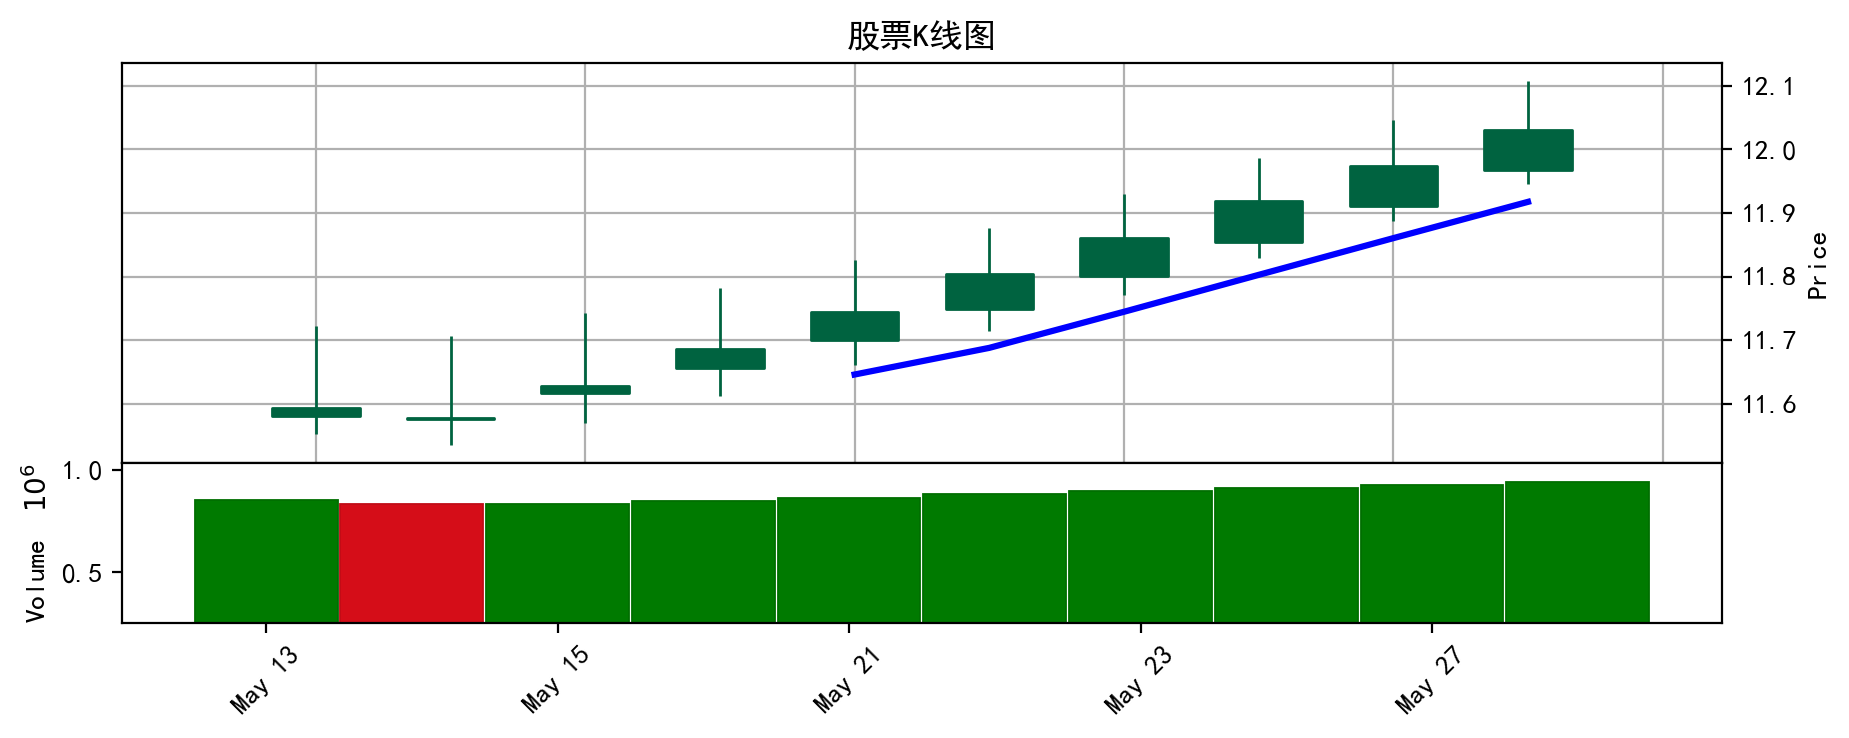

In [36]:
start_time = '2024-05-13'
end_time = '2024-05-28'
future = future.rename(columns={'开盘': 'open', '最高': 'high', '收盘': 'close', '最低': 'low', '成交量': 'volume'})
kline(future,start_time,end_time)